### Crytocurrencies analyis

#### Objective
Show statistical 'analysis' on
- Random variable 'winning', where X='BTC' is the event where BTC price increase the most in pct compared to other ccys during in interval
- Random varible 'no trade', where X='BTC' is the event where BTC was not traded during an interval

#### Approach
Just explore data by counting for now 


#### Dependencies

In [113]:
# Tech
import os
import sys
import pandas as pd
import numpy as np
import pendulum
import matplotlib
import matplotlib.pyplot as plt
import datetime

from src.models import DeltaPoint, Trade    
from src.computed import get_pricepoints_winner_count, get_all_result

intervals = ['15', '20', '30', '60', '120', '300']

#### Some info about data points

In [115]:
# Get data
all_result = get_all_result()
timestamps = [pendulum.from_timestamp(ts) for ts in all_result[0]]
data_points = all_result[1]
for data_point in data_points:
    for interval in intervals:
        mm = data_point[interval]['movements']
        data_point[interval]['movements'] = np.array(mm) / sum(mm)

In [86]:
def show_eval_period(timestamps):
    print(f'Evaluation period: from {timestamps[0].to_formatted_date_string()} to {timestamps[-1].to_formatted_date_string()}')
    print(f'Number of days: {timestamps[-1].diff(timestamps[0]).in_days()}')
          
show_eval_period(timestamps)

Evaluation period: from Jul 02, 2017 to Jan 02, 2019
Number of days: 549


In [87]:
# Settings
periods = [7, 30, 183, 365]
periods.append(len(timestamps))
periods_text = ['Week', 'Month', 'Half-year', 'Year', 'All']
winners = ['BTCUSD', 'ETHUSD', 'LTCUSD', 'XRPUSD', 'EOSUSD', 'NONE']

## Winning distribution

In [68]:
def compare_winning_periods(interval):
    winners_dict = {}
    for w in winners:
        winners_dict[w] = []
        for p in periods:
            count = 0
            for i in range(p):
                count += data_points[i][str(interval)]['winners'][w]
                
            avg = count / p
                
            winners_dict[w].append(avg)
                
    df = pd.DataFrame(winners_dict, index=periods_text).round(2)
    
    return df

#### 15s interval

In [40]:
df = compare_winning_periods(15)
df.head()

,BTCUSD,ETHUSD,LTCUSD,XRPUSD,EOSUSD,NONE
Week,0.40,0.26,0.12,0.03,0.13,0.06
Month,0.41,0.27,0.10,0.04,0.13,0.05
Half-year,0.44,0.24,0.12,0.06,0.11,0.02
Year,0.43,0.22,0.12,0.08,0.12,0.02
All,0.42,0.22,0.11,0.09,0.12,0.05


#### 20s interval

In [41]:
df = compare_winning_periods(20)
df.head()

,BTCUSD,ETHUSD,LTCUSD,XRPUSD,EOSUSD,NONE
Week,0.41,0.26,0.13,0.04,0.13,0.03
Month,0.42,0.26,0.11,0.05,0.13,0.03
Half-year,0.45,0.24,0.13,0.07,0.11,0.01
Year,0.44,0.22,0.12,0.09,0.12,0.01
All,0.43,0.22,0.11,0.10,0.12,0.03


#### 30s interval

In [42]:
df = compare_winning_periods(30)
df.head()

,BTCUSD,ETHUSD,LTCUSD,XRPUSD,EOSUSD,NONE
Week,0.42,0.25,0.13,0.05,0.13,0.01
Month,0.43,0.25,0.11,0.06,0.13,0.01
Half-year,0.46,0.22,0.13,0.08,0.11,0.00
Year,0.45,0.20,0.13,0.10,0.11,0.01
All,0.44,0.21,0.12,0.11,0.11,0.01


#### 60s interval

In [43]:
df = compare_winning_periods(60)
df.head()

,BTCUSD,ETHUSD,LTCUSD,XRPUSD,EOSUSD,NONE
Week,0.43,0.24,0.14,0.07,0.12,0.0
Month,0.44,0.22,0.12,0.09,0.12,0.0
Half-year,0.47,0.19,0.13,0.10,0.11,0.0
Year,0.46,0.18,0.12,0.13,0.10,0.0
All,0.45,0.18,0.12,0.14,0.10,0.0


#### 2 mins interval

In [44]:
df = compare_winning_periods(120)
df.head()

,BTCUSD,ETHUSD,LTCUSD,XRPUSD,EOSUSD,NONE
Week,0.45,0.21,0.14,0.09,0.11,0.0
Month,0.46,0.19,0.12,0.12,0.11,0.0
Half-year,0.49,0.17,0.12,0.12,0.10,0.0
Year,0.47,0.16,0.11,0.16,0.09,0.0
All,0.46,0.16,0.12,0.17,0.09,0.0


#### 5 mins interval

In [45]:
df = compare_winning_periods(300)
df.head()

,BTCUSD,ETHUSD,LTCUSD,XRPUSD,EOSUSD,NONE
Week,0.47,0.19,0.13,0.10,0.11,0.0
Month,0.47,0.16,0.11,0.16,0.10,0.0
Half-year,0.50,0.14,0.11,0.15,0.10,0.0
Year,0.49,0.13,0.10,0.20,0.08,0.0
All,0.48,0.13,0.10,0.21,0.08,0.0


#### 60s interval

In [46]:
df = compare_winning_periods(60)
df.head()

,BTCUSD,ETHUSD,LTCUSD,XRPUSD,EOSUSD,NONE
Week,0.43,0.24,0.14,0.07,0.12,0.0
Month,0.44,0.22,0.12,0.09,0.12,0.0
Half-year,0.47,0.19,0.13,0.10,0.11,0.0
Year,0.46,0.18,0.12,0.13,0.10,0.0
All,0.45,0.18,0.12,0.14,0.10,0.0


## Winning ratio plot 
(60s interval)

In [96]:
def plot_winning_ratio(period):
    x = [datetime.datetime.utcfromtimestamp(ts) for ts in all_result[0]]

    
    for winner in winners:
        values = [data_point['60']['winners'][winner] for data_point in data_points]
        fig = plt.gcf()
        plt.plot(x, values)
        
    fig.set_size_inches(18.5, 10.5)
    fig.autofmt_xdate()
    plt.legend(winners, loc='upper right')
    plt.show()

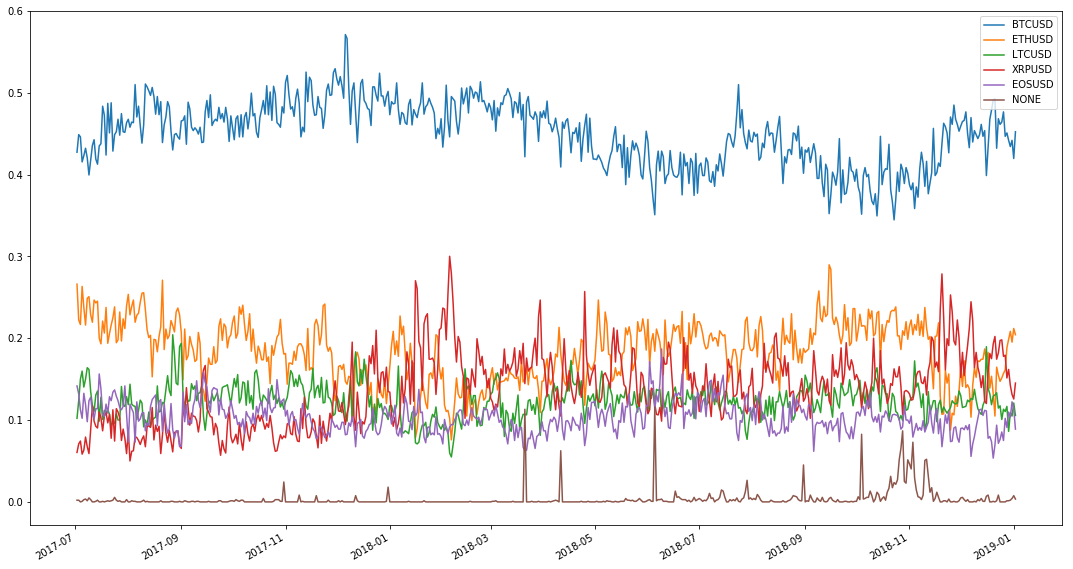

In [97]:
plot_winning_ratio(60)

### Winning ratio spectrum  
(60s interval)

In [107]:
# cols: mean min max
# rows: currency
indices = winners
rows = []
cols = ['Mean', 'Min', 'Max']
for winner in winners:
    values = np.array([data_point['60']['winners'][winner] for data_point in data_points])
    row = []
    row.append(values.mean())
    row.append(values.min())
    row.append(values.max())
    rows.append(row)
    
spect_df = pd.DataFrame(rows, columns=cols, index=indices).round(2)
spect_df.head()


,Mean,Min,Max
BTCUSD,0.45,0.34,0.57
ETHUSD,0.18,0.08,0.29
LTCUSD,0.12,0.05,0.20
XRPUSD,0.14,0.05,0.30
EOSUSD,0.10,0.05,0.19


### Trade count ratio

In [119]:
def compare_notrades_periods(interval):
    tradecount_dict = {}
    for trade_count in range(6):
        tradecount_dict[trade_count] = []
        for p in periods:
            count = 0
            for i in range(p):
                count += data_points[i][str(interval)]['movements'][trade_count]
                
            avg = count / p
                
            tradecount_dict[trade_count].append(avg)
                
    df = pd.DataFrame(tradecount_dict, index=periods_text).round(2)
    
    return df

compare_notrades_periods(30)

,0,1,2,3,4,5
Week,0.01,0.07,0.21,0.35,0.29,0.06
Month,0.01,0.07,0.20,0.34,0.29,0.08
Half-year,0.00,0.03,0.12,0.27,0.33,0.23
Year,0.01,0.03,0.11,0.23,0.32,0.30
All,0.01,0.06,0.14,0.23,0.29,0.26
